In [2]:
using CSV, DataFrames, Statistics
using Plots, StatsPlots
using ColorSchemes
using Measures

function se(x)
    std(x)/sqrt(length(x))
end

se (generic function with 1 method)

In [3]:
prefix = "aistats-rev/"
df = CSV.read(prefix*"realy/"*"FINAL_results.csv", DataFrame); df[!,:kMissing] .= Inf

for dir = ["linear_mar/", "linear_nmar/", "linear_mar_adv/", "nn_mar/", "nn_nmar/", "nn_mar_adv/",]
    directory = prefix*"fakey/"*dir
    df = vcat(df, CSV.read(directory*"FINAL_results.csv", DataFrame)[:,names(df)])
end

#### Formatting Fixing

In [45]:
# pb_dataset = ["credit-approval", "Ecdat-Mofa", "sleep"]
# filter!(t -> t[:dataset] ∉ pb_dataset, df) ;

In [4]:
filter!( t -> !isnan(t[:osr2]), df) ;

#### Filter and rename method

In [5]:
df[!,:method] .= map(t -> replace(t, "Imp-then-Reg 4" => "mean Imp-then-Reg"), df[:,:method]) #Identify mean imputation
df[!,:method] .= map(t -> replace(t, "Imp-then-Reg 2" => "mice Imp-then-Reg"), df[:,:method]) #Identify mean imputation

filter!(t -> !startswith(t[:method], "Imp-then-Reg"), df); #Remove other Imp-then-Reg strategies

In [6]:
function rename_Xsetting(x)
    if x == "real_X"
        "Real"
    elseif x == "real_X_mar"
        "MAR"
    elseif x == "real_X_nmar"
        "NMAR"
    elseif x == "real_X_mar_adv"
        "AM"
    else
        x
    end
end

function rename_Ysetting(x)
    if x == "real_Y"
        "Real"
    elseif x == "syn_Y_linear"
        "Syn Y - linear"
    elseif x == "syn_Y_nn"
        "Syn Y - NN"
    else
        y
    end
end

df[!,:X_setting] .= map(rename_Xsetting, df[:,:X_setting])
df[!,:Y_setting] .= map(rename_Ysetting, df[:,:Y_setting]);

### Classification indicator

In [7]:
df_list = unique(df[:,[:dataset]])
df_list[!,:class_ind] .= 0 ;

In [8]:
for i in 1:nrow(df_list)
    dname = df_list[i,:dataset]

    try 
        target_list = names(CSV.read("../datasets/"*dname*"/Y.csv", missingstrings=["", "NaN"], DataFrame))

        Y = []
        if length(target_list) <= 2
            target_name = setdiff(target_list, [:Id])[1]
            Y = CSV.read("../datasets/"*dname*"/Y.csv", missingstrings=["", "NaN"], DataFrame)[:,target_name]
        else
            setdiff!(target_list, [:Id, :target])
            sort!(target_list)
            Y = CSV.read("../datasets/"*dname*"/Y.csv", missingstrings=["", "NaN"], DataFrame)[:,target_list[1]]
        end
        if eltype(Y) ∉ [Float64, Int64, Union{Float64,Missing}, Union{Int64,Missing}]
            using StatsBase
            cm = countmap(Y)
            level = collect(keys(cm))[argmax(collect(values(cm)))]
            Y = 1.0 .* (Y .== level)
        end
        ind_availtarget = .!ismissing.(Y)
        Y = 1.0 .* Y[ind_availtarget] #Remove missing entries before converting to Float64 !
        df_list[i,:class_ind] = 1*(length(unique(Y)) == 2)
        
    catch 
        ()
    end 

end

┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344


┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{

┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{

┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{

┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{

┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{

┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /Users/jeanpauphilet/.julia/packages/CSV/OnldF/src/context.jl:344
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{

In [9]:
df = leftjoin(df, df_list, on =:dataset) ;

### Figure 3a: Adaptive LR, what is the best method (static, intercept, affine, finite)?

In [36]:
subdf = filter(t -> startswith(t[:method], "Adaptive LR"), df) #&& !endswith(t[:method], "best"), df)
subdf[!,:method] .= map(t -> replace(t, "Adaptive LR - " => ""), subdf[:, :method])
subdf[!,:method] .= map(t -> replace(t, "best" => "Best"), subdf[:, :method])
subdf[!,:setting] .= subdf[:,:Y_setting] .*"/".*subdf[:,:X_setting] ;

In [37]:
method_order = ["Affine intercept only" "Affine" "Finite" "Best"]
setting_order = ["MAR" "NMAR" "AM" "Real"]
function add_padding(st, xorder)
    Nx = length(xorder)
    i = findfirst(xorder[:] .== st)
    si = " "^(Nx-i)
    return si * st * si
end
subdf[!,:method] .= map(t -> add_padding(t, method_order), subdf[:,:method])
subdf[!,:X_setting] .= map(t -> add_padding(t, setting_order), subdf[:,:X_setting]) ;

In [38]:
gd = groupby(subdf, [:method, :X_setting])
stats = combine(gd, :osr2 .=> [mean, se]) ;

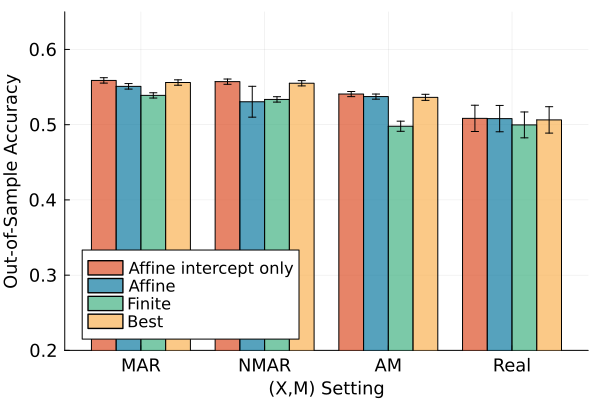

In [39]:
pal = ColorSchemes.Egypt
@df stats groupedbar(:X_setting, :osr2_mean, 
    yerr=:osr2_se, group=:method, legend=:bottomleft, label=method_order,
    palette=pal, fillalpha=.7,
    guidefontsize=12, tickfontsize=12, legendfontsize=11)
xaxis!("(X,M) Setting")
yaxis!("Out-of-Sample Accuracy", ylims=(0.2,0.65))

In [40]:
mkpath("../figures/adaptive_regression/validation/")
Plots.savefig("../figures/adaptive_regression/validation/"*"realX_allY_evaluate_AdaptiveLR.pdf")

"/Users/jeanpauphilet/Dropbox/Work/1 - Research/PHD/figures/adaptive_regression/validation/realX_allY_evaluate_AdaptiveLR.pdf"

### Figure 3b: Joint ITR, what is the best downstream regressor?

In [41]:
subdf = filter(t -> startswith(t[:method], "Joint Imp-then-Reg"), df) #&& !endswith(t[:method], "best"), df)
subdf[!,:method] .= map(t -> replace(t, "Joint Imp-then-Reg - " => ""), subdf[:, :method])

method_order = ["linear" "tree" "rf" "xgboost" "best"]
xsetting_order = ["MAR" "NMAR" "AM" "Real"]
ysetting_order = ["Syn Y - linear" "Syn Y - NN" "Real"]
function add_padding(st, xorder)
    Nx = length(xorder)
    i = findfirst(xorder[:] .== st)
    si = " "^(Nx-i)
    return si * st * si
end
subdf[!,:method] .= map(t -> add_padding(t, method_order), subdf[:,:method])
subdf[!,:X_setting] .= map(t -> add_padding(t, xsetting_order), subdf[:,:X_setting])
subdf[!,:Y_setting] .= map(t -> add_padding(t, ysetting_order), subdf[:,:Y_setting]) ;

gd = groupby(subdf, [:method, :Y_setting])
stats = combine(gd, :osr2 .=> [mean, se])

Row,method,Y_setting,osr2_mean,osr2_se
,String,String,Float64,Float64
1,linear,Real,0.509914,0.0174138
2,tree,Real,0.448426,0.0189336
3,rf,Real,0.579637,0.0184025
4,xgboost,Real,0.574531,0.0169552
5,best,Real,0.594548,0.01684
6,linear,Syn Y - linear,0.635633,0.00254725
7,tree,Syn Y - linear,0.421575,0.00336948
8,rf,Syn Y - linear,0.525826,0.00238749
9,xgboost,Syn Y - linear,0.546568,0.0027219


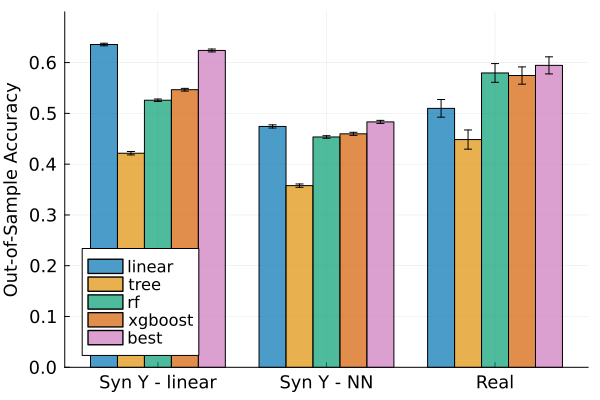

In [42]:
pal = ColorSchemes.seaborn_colorblind

@df stats groupedbar(:Y_setting, :osr2_mean, 
    yerr=:osr2_se, group=:method, legend=:bottomleft, label=method_order,
    palette=pal, fillalpha=.7,
    guidefontsize=12, tickfontsize=12, legendfontsize=11)
yaxis!("Out-of-Sample Accuracy", ylims=(0.,0.7))

In [43]:
Plots.savefig("../figures/adaptive_regression/validation/"*"realX_allY_evaluate_JointItR.pdf")

"/Users/jeanpauphilet/Dropbox/Work/1 - Research/PHD/figures/adaptive_regression/validation/realX_allY_evaluate_JointItR.pdf"

### Figure 4: Adaptive LR/Joint ITR vs. Benchmarks

In [58]:
# subdf = filter(t -> endswith(t[:method], "- best") || endswith(t[:method], "RF MIA"), df) #&& !endswith(t[:method], "best"), df)
subdf = filter(t -> endswith(t[:method], "- best") || endswith(t[:method], "RF MIA") || endswith(t[:method], "XGBoost"), df) #&& !endswith(t[:method], "best"), df)
filter!(t -> t[:method] != "Oracle X - best", subdf)
subdf[!,:method] .= map(t -> replace(t, "Oracle XM" => "Oracle"), subdf[:,:method])
subdf[!,:method] .= map(t -> replace(t, " - best" => ""), subdf[:,:method])
subdf[!,:method] .= map(t -> replace(t, "RF MIA" => "RF"), subdf[:,:method])

# subdf[!,:method] .= map(t -> replace(t, "best" => "Best"), subdf[:, :method])
# subdf[!,:setting] .= subdf[:,:Y_setting] .*"/".*subdf[:,:X_setting]

# method_order = ["Complete Features" "mean Imp-then-Reg" "RF MIA" "Adaptive LR" "Joint Imp-then-Reg" "Oracle"]
method_order = ["Complete Features" "mean Imp-then-Reg" "mice Imp-then-Reg" "XGBoost" "RF" "Adaptive LR" "Joint Imp-then-Reg" "Oracle"]
xsetting_order = ["MAR" "NMAR" "AM" "Real"]
ysetting_order = ["Syn Y - linear" "Syn Y - NN" "Real"]
function add_padding(st, xorder)
    Nx = length(xorder)
    i = findfirst(xorder[:] .== st)
    si = " "^(Nx-i)
    return si * st * si
end
subdf[!,:method] .= map(t -> add_padding(t, method_order), subdf[:,:method])
subdf[!,:X_setting] .= map(t -> add_padding(t, xsetting_order), subdf[:,:X_setting])
subdf[!,:Y_setting] .= map(t -> add_padding(t, ysetting_order), subdf[:,:Y_setting])

gd = groupby(subdf, [:method, :X_setting])
stats = combine(gd, :osr2 .=> [mean, se])

Row,method,X_setting,osr2_mean,osr2_se
,String,String,Float64,Float64
1,XGBoost,Real,0.569247,0.0172526
2,RF,Real,0.578609,0.0184179
3,Complete Features,Real,0.500157,0.0168151
4,mice Imp-then-Reg,Real,0.584285,0.0176766
5,mean Imp-then-Reg,Real,0.596248,0.0175133
6,Joint Imp-then-Reg,Real,0.594548,0.01684
7,Adaptive LR,Real,0.506307,0.017552
8,XGBoost,MAR,0.504228,0.00376404
9,RF,MAR,0.48943,0.00307093


In [59]:
unique(subdf[:,:method])

8-element Vector{String}:
 "    XGBoost    "
 "   RF   "
 "       Complete Features       "
 "     mice Imp-then-Reg     "
 "      mean Imp-then-Reg      "
 " Joint Imp-then-Reg "
 "  Adaptive LR  "
 "Oracle"

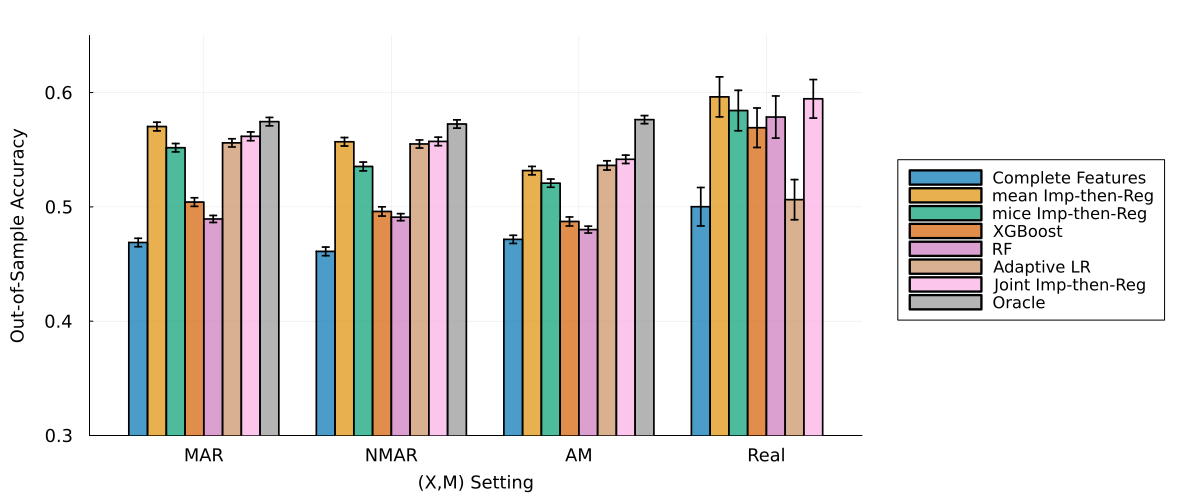

In [60]:
@df stats groupedbar(:X_setting, :osr2_mean, 
    yerr=:osr2_se, group=:method, legend=:bottomleft, label=method_order,
    palette=pal, fillalpha=.7, lw=1.7,
#     fillstyle=[:/ :\ :- :| :+], fw =10,
    legendposition=:outerright,
    guidefontsize=12, tickfontsize=12, legendfontsize=11,
    size = (1200, 500), margin=7mm)
xaxis!("(X,M) Setting")
yaxis!("Out-of-Sample Accuracy", ylims=(0.3,0.65))

In [61]:
mkpath("../figures/adaptive_regression/comparison/")
Plots.savefig("../figures/adaptive_regression/comparison/"*"realX_compare_ItR_adaptive.pdf")

"/Users/jeanpauphilet/Dropbox/Work/1 - Research/PHD/figures/adaptive_regression/comparison/realX_compare_ItR_adaptive.pdf"

In [62]:
CSV.write( "../figures/adaptive_regression/comparison/"*"realX_compare_ItR_adaptive_data.csv", stats)

"../figures/adaptive_regression/comparison/realX_compare_ItR_adaptive_data.csv"

In [63]:
#Table SM.4 - Raw data for Figure 4
methods = sort(unique(stats[:,:method]))
settings = sort(unique(stats[:,:X_setting]))
s = "\\begin{tabular}{l"*("c"^length(settings))*"}\n"

s *= " Method "
for m in settings
    s *= " & "*m
end
s *= " \\\\ \n"

for m in methods
    s *= string(m) * " "
        
    aux = filter(t -> t[:method] ==  m, stats)

    for p in settings
        aux2 = filter(t -> t[:X_setting] ==  p , aux)
        if nrow(aux2) > 0
            s *= " & "*string(round(aux2[1,:osr2_mean], digits=3))*" ("*string(round(aux2[1,:osr2_se], digits=3))*")"
        else
            s *= " & "
        end
    end
    s *= " \\\\ \n"
end
s *= "\\bottomrule \n \\end{tabular} \n"
# @show m
# aux = filter(t -> t[:X_setting] ==  m, stats)

print(s)

\begin{tabular}{lcccc}
 Method  &    MAR    &   NMAR   &  AM  & Real \\ 
       Complete Features         & 0.469 (0.004) & 0.461 (0.004) & 0.472 (0.004) & 0.5 (0.017) \\ 
      mean Imp-then-Reg        & 0.57 (0.004) & 0.557 (0.004) & 0.532 (0.004) & 0.596 (0.018) \\ 
     mice Imp-then-Reg       & 0.552 (0.004) & 0.535 (0.004) & 0.521 (0.004) & 0.584 (0.018) \\ 
    XGBoost      & 0.504 (0.004) & 0.496 (0.004) & 0.487 (0.004) & 0.569 (0.017) \\ 
   RF     & 0.489 (0.003) & 0.491 (0.003) & 0.48 (0.003) & 0.579 (0.018) \\ 
  Adaptive LR    & 0.556 (0.004) & 0.555 (0.004) & 0.536 (0.004) & 0.506 (0.018) \\ 
 Joint Imp-then-Reg   & 0.562 (0.004) & 0.557 (0.004) & 0.542 (0.004) & 0.595 (0.017) \\ 
Oracle  & 0.575 (0.004) & 0.573 (0.004) & 0.576 (0.004) &  \\ 
\bottomrule 
 \end{tabular} 


In [66]:
filter(t -> t[:Y_setting] == "Real", subdf) #unique(subdf[:,:Y_setting])

3-element Vector{String}:
 "Real"
 "  Syn Y - linear  "
 " Syn Y - NN "

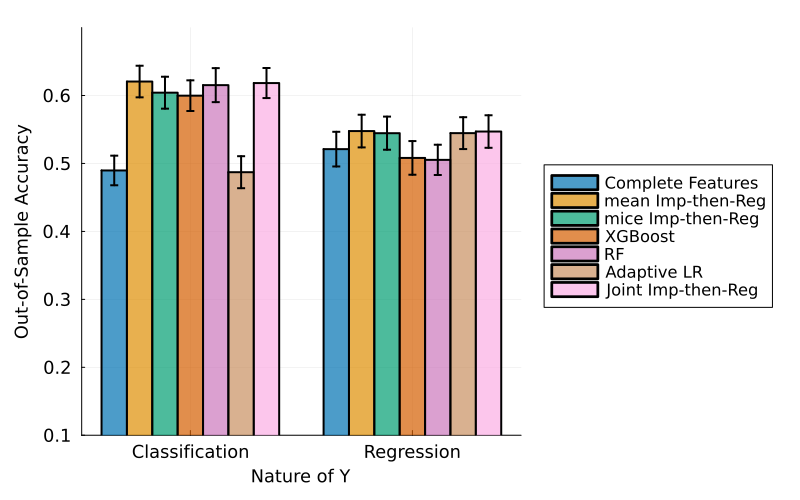

In [68]:
#Figure SM.2 -- Figure 4, stratified by nature of Y (regression or classification)
gd = groupby(subdf, [:method, :X_setting, :class_ind])
stats = combine(gd, :osr2 .=> [mean, se])

stats[!,:class_ind] .= map(t -> t == 1 ? "Classification" : "Regression", stats[:,:class_ind]) ;

@df filter(t -> t[:X_setting] == "Real", stats) groupedbar(:class_ind, :osr2_mean, 
    yerr=:osr2_se, group=:method, legend=:bottomleft, label=method_order,
    palette=pal, fillalpha=.7, lw=2,
#     fillstyle=[:/ :\ :- :| :+], fw =10,
    legendposition=:outerright,
    guidefontsize=12, tickfontsize=12, legendfontsize=11,
    size = (800, 500), margin=5mm)
xaxis!("Nature of Y")
yaxis!("Out-of-Sample Accuracy", ylims=(0.1,0.70))

In [69]:
Plots.savefig("../figures/adaptive_regression/comparison/"*"realX_compare_ItR_adaptive_RealYonly.pdf")

"/Users/jeanpauphilet/Dropbox/Work/1 - Research/PHD/figures/adaptive_regression/comparison/realX_compare_ItR_adaptive_RealYonly.pdf"

### Figures SM.3-4: Win Rates

In [76]:
alr = false
ourmethod = (alr ? "Adaptive LR" : "Joint Imp-then-Reg")*" - best"
competitor = "mean Imp-then-Reg - best"
subdf = filter(t -> t[:method] in [ourmethod, competitor], df)
subdf[!,:pMissing] .= subdf[!,:kMissing] ./ subdf[!,:k] ;

widedf = unstack(
    subdf[:,[:dataset,:pMissing,:X_setting,:Y_setting,:method,:splitnum,:osr2]],
    [:dataset,:pMissing,:X_setting,:Y_setting,:splitnum],
    :method, 
    :osr2, 
    allowduplicates=:true
)
widedf[!,:win] = widedf[:,competitor] .< widedf[:,ourmethod]
gd = groupby(widedf, [:dataset,:pMissing,:X_setting,:Y_setting])
windf = combine(gd, :win => mean) ;


xsetting_order = ["MAR", "NMAR", "AM", "Real"]
ysetting_order = ["Syn Y - linear" "Syn Y - NN" "Real"]
function add_padding(st, xorder)
    Nx = length(xorder)
    i = findfirst(xorder[:] .== st)
    si = " "^(Nx-i)
    return si * st * si
end
windf[!,:X_setting] .= map(t -> add_padding(t, xsetting_order), windf[:,:X_setting])
windf[!,:Y_setting] .= map(t -> add_padding(t, ysetting_order), windf[:,:Y_setting]) ;

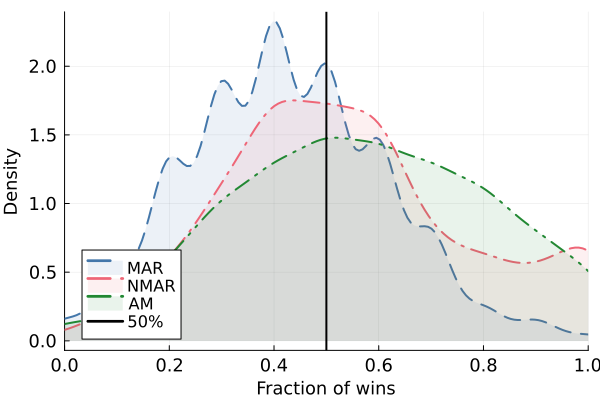

In [77]:
windf = windf[completecases(windf),:];

pal = (ColorSchemes.tol_bright)
@df filter(t -> t[:X_setting] != "Real", windf) density(:win_mean, group=:X_setting, 
                    fill=true, fillalpha=.1, ls=:auto, lw=2,
                    legend = :bottomleft, label = ["MAR" "NMAR" "AM"],
                    palette = pal, 
                    guidefontsize=12, tickfontsize=12, legendfontsize=11)
vline!([0.5], lw=2, color=:black, label="50%")
xaxis!("Fraction of wins", xlims=(0,1))
yaxis!("Density")

In [78]:
mkpath("../figures/adaptive_regression/winrate/")
Plots.savefig("../figures/adaptive_regression/winrate/realX_winrate_"*(alr ? "AdaptiveLR" : "JointItR")*".pdf")

"/Users/jeanpauphilet/Dropbox/Work/1 - Research/PHD/figures/adaptive_regression/winrate/realX_winrate_JointItR.pdf"

### Output 4 bis: Win Rate Real Y

In [79]:
alr = false
ourmethod = (alr ? "Adaptive LR" : "Joint Imp-then-Reg")*" - best"
subdf = filter(t -> t[:method] in [ourmethod, "mean Imp-then-Reg - best"], df)
subdf[!,:pMissing] .= subdf[!,:kMissing] ./ subdf[!,:k] ;


widedf = unstack(
    subdf[:,[:dataset,:pMissing,:X_setting,:Y_setting,:method,:splitnum,:osr2]],
    [:dataset,:pMissing,:X_setting,:Y_setting,:splitnum],
    :method, 
    :osr2, 
    allowduplicates=:true
)
widedf[!,:win] = widedf[:,"mean Imp-then-Reg - best"] .< widedf[:,ourmethod]
gd = groupby(widedf, [:dataset,:pMissing,:X_setting,:Y_setting])
windf = combine(gd, :win => mean) ;


xsetting_order = ["MAR", "NMAR", "AM", "Real"]
ysetting_order = ["Syn Y - linear" "Syn Y - NN" "Real"]
function add_padding(st, xorder)
    Nx = length(xorder)
    i = findfirst(xorder[:] .== st)
    si = " "^(Nx-i)
    return si * st * si
end
windf[!,:X_setting] .= map(t -> add_padding(t, xsetting_order), windf[:,:X_setting])
windf[!,:Y_setting] .= map(t -> add_padding(t, ysetting_order), windf[:,:Y_setting]) ;

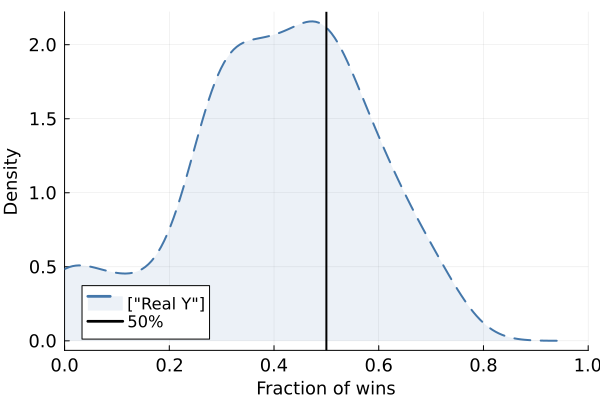

In [80]:
pal = (ColorSchemes.tol_bright)
@df filter(t -> t[:X_setting] == "Real", windf) density(:win_mean, group=:X_setting, 
                    fill=true, fillalpha=.1, ls=:auto, lw=2.,
                    legend = :bottomleft, label = ["Real Y"],
                    palette = pal, 
                    guidefontsize=12, tickfontsize=12, legendfontsize=11)
vline!([0.5], lw=2, color=:black, label="50%")
xaxis!("Fraction of wins", xlims=(0,1))
yaxis!("Density")

In [90]:
Plots.savefig("../figures/adaptive_regression/winrate/realX_realY_winrate_"*(alr ? "AdaptiveLR" : "JointItR")*".pdf")

"/Users/jeanpauphilet/Dropbox/Work/1 - Research/PHD/figures/realX_realY_winrate_JointItR.pdf"

### Output 5: k Missing vs. OSR2

In [47]:
subdf = filter(t -> endswith(t[:method], "- best"), df) #&& !endswith(t[:method], "best"), df)
filter!(t -> t[:method] != "Oracle X - best", subdf)
subdf[!,:method] .= map(t -> replace(t, "Oracle XM" => "Oracle"), subdf[:,:method])
subdf[!,:method] .= map(t -> replace(t, " - best" => ""), subdf[:,:method])
subdf[!,:pMissing] .= round.(subdf[!,:kMissing] ./ subdf[!,:k], digits=1) ;

method_order = ["Complete Features" "mean Imp-then-Reg" "Adaptive LR" "Joint Imp-then-Reg" "Oracle"]
xsetting_order = ["MAR" "NMAR" "AM" "Real"]
ysetting_order = ["Syn Y - linear" "Syn Y - NN" "Real"]
function add_padding(st, xorder)
    Nx = length(xorder)
    i = findfirst(xorder[:] .== st)
    si = " "^(Nx-i)
    return si * st * si
end
subdf[!,:method] .= map(t -> add_padding(t, method_order), subdf[:,:method])
subdf[!,:X_setting] .= map(t -> add_padding(t, xsetting_order), subdf[:,:X_setting])
subdf[!,:Y_setting] .= map(t -> add_padding(t, ysetting_order), subdf[:,:Y_setting])

gd = groupby(subdf, [:method, :X_setting, :pMissing])
stats = combine(gd, :osr2 .=> [mean, se])
sort!(stats, :pMissing) ;

In [48]:
for (i,m) in enumerate(sort(unique(stats[:,:X_setting])))
    @df filter(t -> t[:X_setting] ==  m, stats) plot(:pMissing, :osr2_mean, yerr=:osr2_se, group=:method, 
        label=method_order, legend=:bottomleft,
        palette=pal, ls=:auto, lw=2,
        guidefontsize=12, tickfontsize=12, legendfontsize=11)
    xaxis!("Fraction of missing features in signal")
    yaxis!("Out-of-sample R2")

    Plots.savefig("../figures/adaptive_comparison/realX_kMissing_vs_R2_"*xsetting_order[i]*".pdf")
end

In [49]:
methods = sort(unique(stats[:,:method]))
pvalues = filter( t -> !isnan(t), sort(unique(stats[:,:pMissing])))
s = "\\begin{tabular}{l"*("c"^length(methods))*"}\n"

s *= " Fraction missing "
for m in methods
    s *= " & "*m
end
s *= " \\\\ \n"

for m in sort(unique(stats[:,:X_setting]))
    if m != "Real"
        s *= "\\multicolumn{6}{l}{Setting: "*m*"} \\\\ \n \\midrule \n"
        aux = filter(t -> t[:X_setting] ==  m, stats)

        for p in pvalues
            s *= " "*string(p)*" "
            for me in methods
                aux2 = filter(t -> t[:method] ==  me && t[:pMissing] == p, aux)
                # @show m,p,size(aux2)
                s *= " & "*string(round(aux2[1,:osr2_mean], digits=3))*" ("*string(round(aux2[1,:osr2_se], digits=3))*")"
            end
            s *= " \\\\ \n"
        end
    end
end
s *= "\\bottomrule \n \\end{tabular} \n"
# @show m
# aux = filter(t -> t[:X_setting] ==  m, stats)

print(s)

(m, p, size(aux2)) = ("   MAR   ", 0.0, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.0, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.0, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.0, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.0, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.1, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.1, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.1, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.1, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.1, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.2, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.2, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.2, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.2, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.2, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.3, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.3, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.3, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.3, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.3, (1, 5))
(m, p, size(aux2)) = ("   MAR   ", 0.4, 

BoundsError: BoundsError: attempt to access 0×5 DataFrame at index [1, :osr2_mean]